<a href="https://colab.research.google.com/github/MayuriJakkanwar/Stock_Price_Prodiction_LSTM/blob/main/StockPricePrediction0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this application is to predict the stock price of any corporation by using machine learning concept Long short term memory(LSTM) 
#to predict the closing stock price of corporation using the last 60 days stock price

In [3]:
#import all libraries file
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# get stock 
df=web.DataReader('AApl', data_source='yahoo', start='2012-01-01', end='2021-01-01' )
# show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.549637
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.254608
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.440399


In [5]:
#get no. of row and column in dataset
df.shape

(2265, 6)

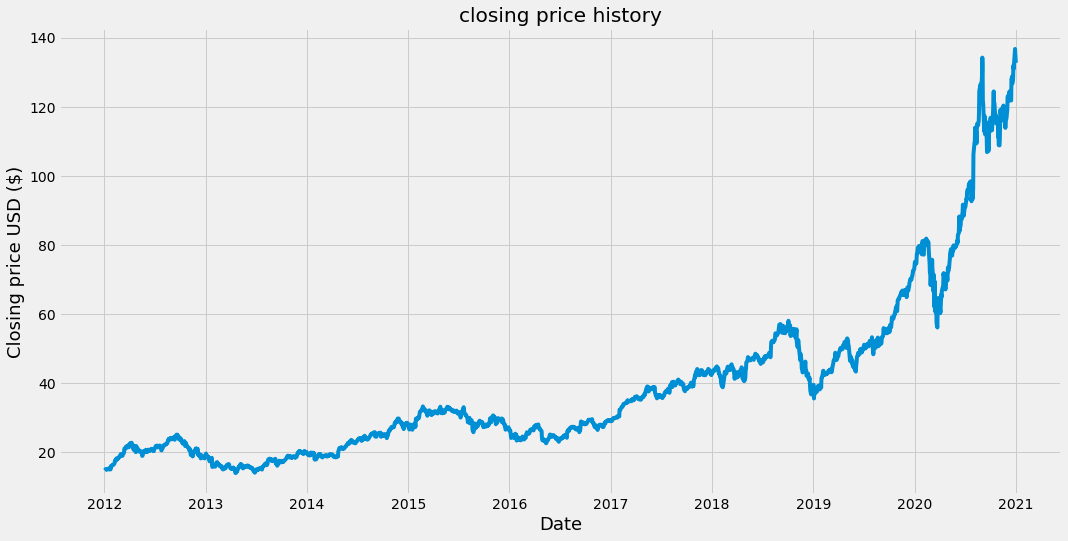

In [6]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('closing price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price USD ($)', fontsize=18)
plt.show()

In [7]:
# create a new data frame with only 'closecolumn'
data=df.filter(['Close'])
# convert the dataframe in numpy array
dataset=data.values
# get the no. of rows to train the model
training_data_len=math.ceil(len(dataset)* .8)
training_data_len

1812

In [8]:
# scale the date
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00602306],
       [0.0066661 ],
       [0.00800165],
       ...,
       [0.98517215],
       [0.97580299],
       [0.96741145]])

In [9]:
#create the taining dataset and scaled training dataset
train_data= scaled_data[0:training_data_len, :]
# split the data into x_train and y_train dataset
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00866214, 0.01073094, 0.00869416,
       0.0163321 , 0.01574144, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117444, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420112,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.0440702 , 0.04499548, 0.0469828 , 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.0626835 , 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00

In [10]:
# convert the x_tarin and y_train to numpy array
x_train, y_train=np.array(x_train), np.array(y_train)

In [11]:
# reshape the data
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1752, 60, 1)

In [12]:
# build the LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
# compile the model
model.compile(optimizer='adam', loss='mean_sequence_error' )


In [28]:
#Trail the model


In [15]:
#create testing dataset
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len-60:, :]
# create dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [16]:
# conver the data numpy array
x_test=np.array(x_test)

In [17]:
# reshape the data
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [18]:
# get the model prediction price value
predictions =model.predict(x_test)
predictions =scaler.inverse_transform(predictions)

In [19]:
# to get root mean sqare error (RMSE)
rmse= np.sqrt(np.mean(predictions - y_test )**2)
rmse 

64.28079457314598

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


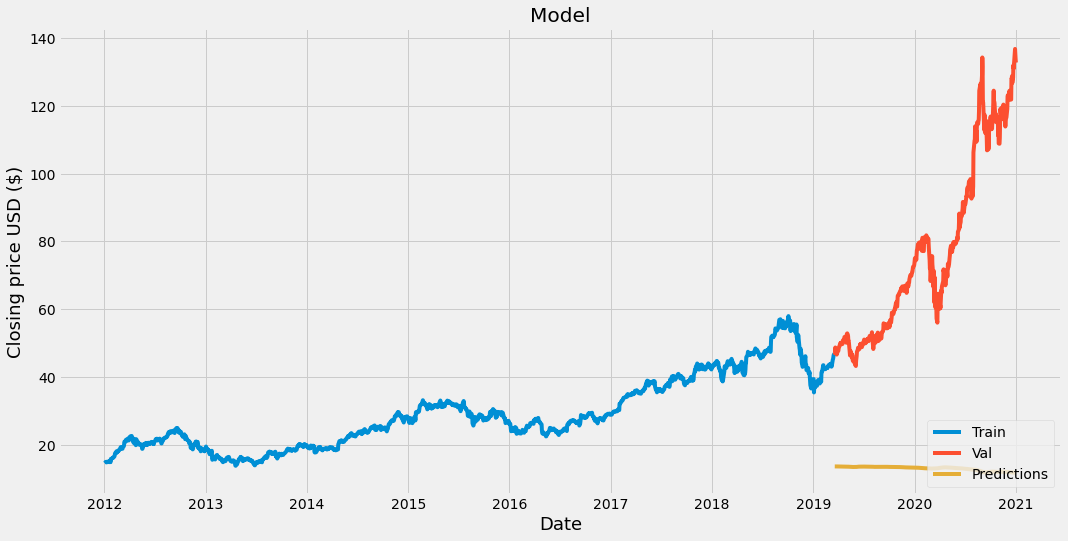

In [20]:
 # Creating trainig and plot the dataset
train= data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions'] = predictions
# visulize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show() 
#

In [21]:
# show valid predicted price
valid

,Close,Predictions
Date,,
2019-03-19,46.632500,13.752832
2019-03-20,47.040001,13.754261
2019-03-21,48.772499,13.755173
2019-03-22,47.762501,13.758245
2019-03-25,47.185001,13.759122
...,...,...
2020-12-24,131.970001,11.902605
2020-12-28,136.690002,11.878313
2020-12-29,134.869995,11.851151


In [22]:
# get the quote
applr_quote= web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17' )
# create a new data frame
new_df=applr_quote.filter(['Close'])
# get the last 60 days closing price value and conver te data frame in array
last_60_days=new_df[-60:].values
# scale the data between 0 and 1
last_60_daya_scaled= scaler.transform(last_60_days)
# create a empty list
X_test=[]
# append the last 60 days
X_test.append(last_60_daya_scaled)
# convert the x_test dataset into nuoty array
X_test=np.array(X_test)
# reshepe the data
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# get the predicted scaled price
pred_price=model.predict(X_test)
# undo the scale
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


[[13.431076]]


In [23]:
# get the quote
applr_quote2= web.DataReader('AAPL', data_source='yahoo', start='2021-05-21', end='2021-05-21' )
print(applr_quote2['Close'])

Date
2021-05-21    125.43
2021-05-21    125.43
Name: Close, dtype: float64
